In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [131]:
train=pd.read_csv('titanic_train.csv')

In [132]:
train.head()
#sibsp->no.of siblings or spouse aboard
#padch->no,of parents or children aboard
#embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

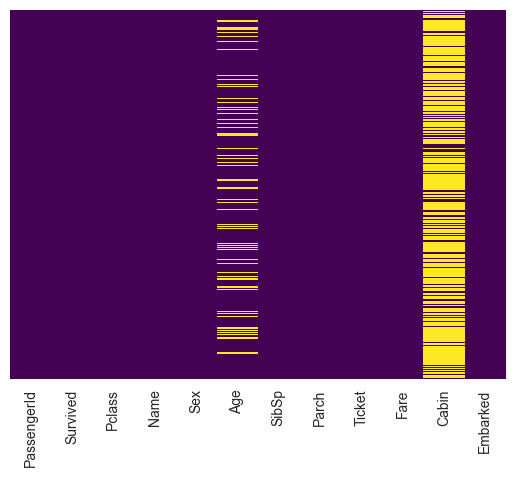

In [134]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [135]:
sns.set_style('whitegrid')

C:\Users\kannoth\AppData\Local\Temp\ipykernel_11660\1416754197.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Survived', ylabel='count'>

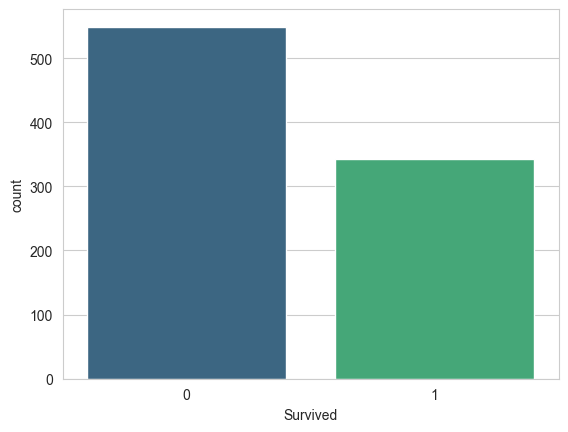

In [136]:
sns.countplot(x='Survived',data=train,palette='viridis')

<Axes: xlabel='Survived', ylabel='count'>

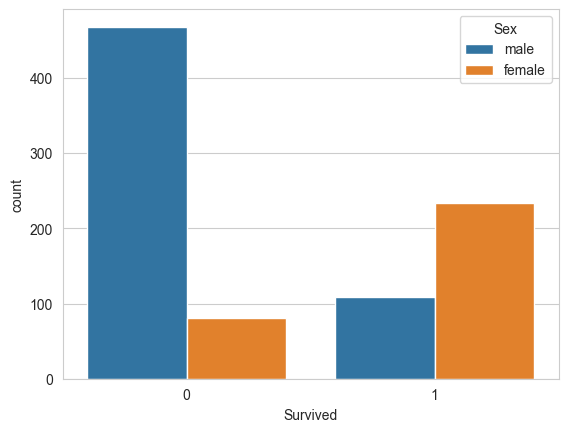

In [137]:
sns.countplot(data=train,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

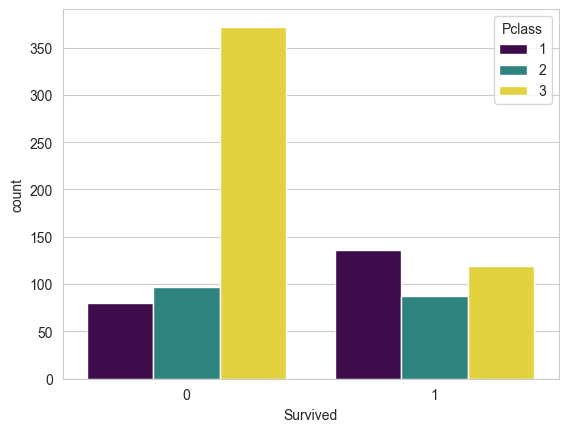

In [138]:
sns.countplot(data=train,x='Survived',hue='Pclass',palette='viridis')

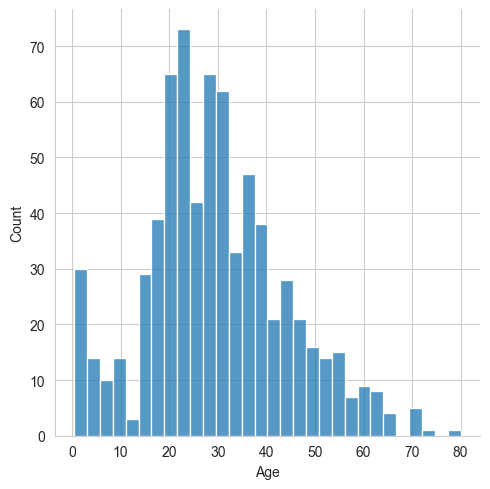

In [139]:
sns.displot(data=train['Age'],bins=30)

<Axes: ylabel='Frequency'>

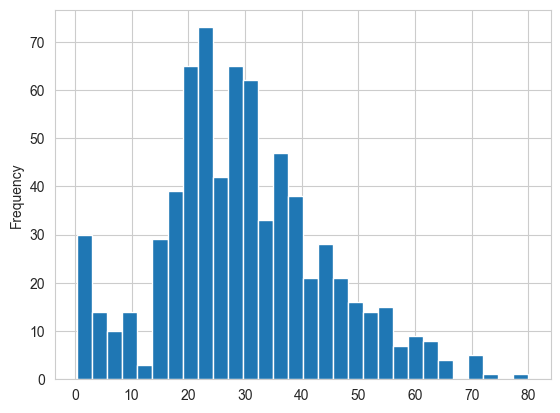

In [140]:
train['Age'].plot.hist(bins=30)

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

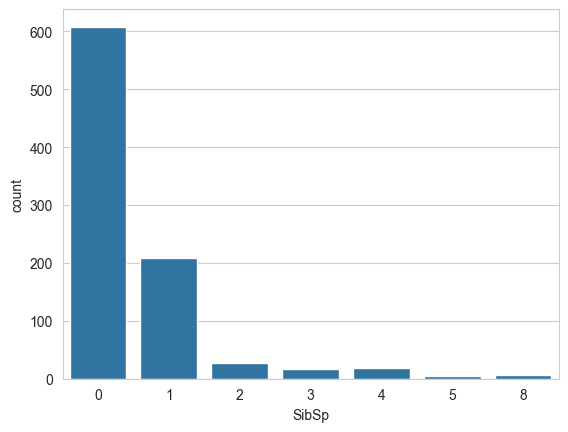

In [142]:
sns.countplot(data=train,x='SibSp')

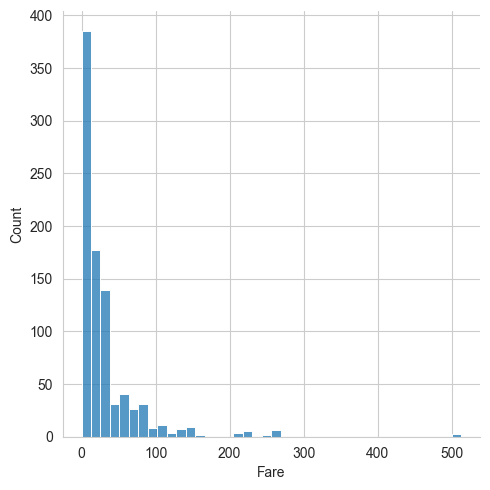

In [143]:
sns.displot(data=train['Fare'],bins=40,)


<Axes: ylabel='Frequency'>

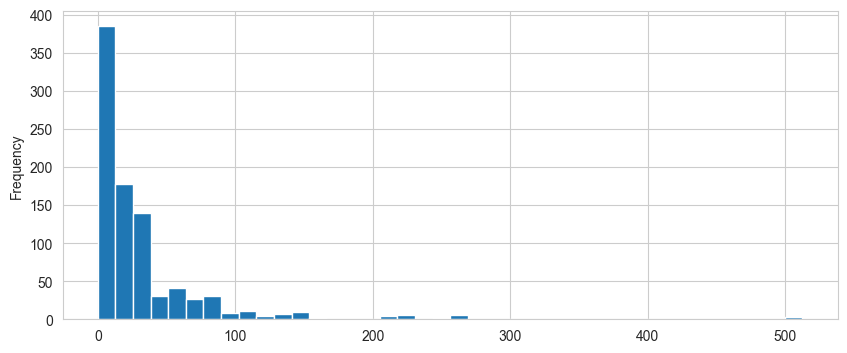

In [144]:
train['Fare'].plot.hist(bins=40,figsize=(10,4))

In [145]:
import cufflinks as cf


In [146]:
cf.go_offline()

In [147]:
train['Fare'].iplot(kind='hist',bins=40)

<Axes: >

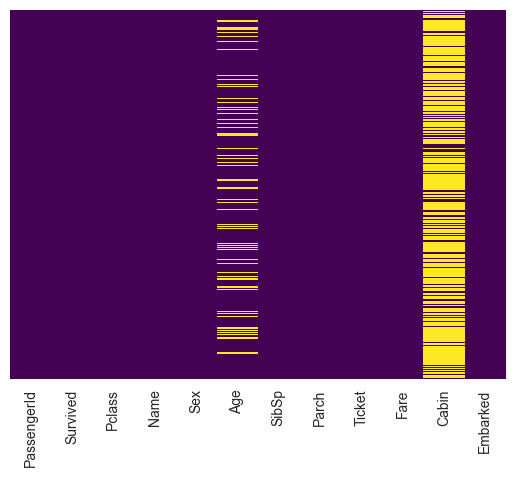

In [148]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#PART2


C:\Users\kannoth\AppData\Local\Temp\ipykernel_11660\929946766.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x700 with 0 Axes>

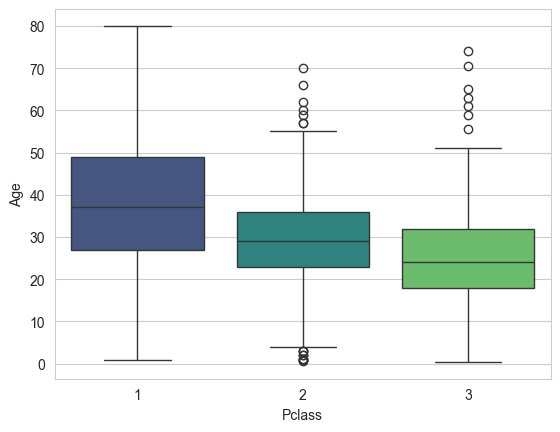

<Figure size 1000x700 with 0 Axes>

In [149]:
sns.boxplot(data=train,x='Pclass',y='Age',palette='viridis')
plt.figure(figsize=(10,7))

In [150]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      #int(train[train['Pclass']==1]['Age'].mean())
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [151]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\kannoth\AppData\Local\Temp\ipykernel_11660\2001567726.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\kannoth\AppData\Local\Temp\ipykernel_11660\2001567726.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [152]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

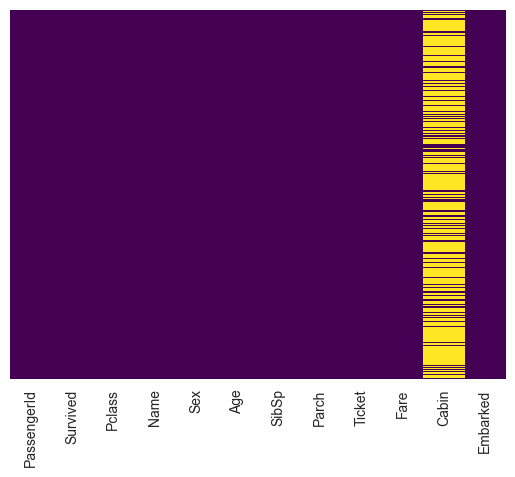

In [153]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [154]:
train.drop('Cabin',axis=1,inplace=True)

In [155]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

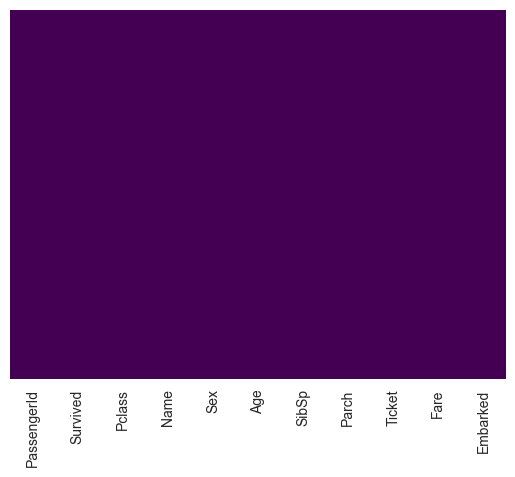

In [156]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [157]:
#if you want to drop any columns which have missing values
#train.dropna(inplace=True)

<h5>THIS IS ONE OF PROCESS OF CLEANING DATA</h5>
<b>HERE WE DEALT WITH MISSING VALUES</b>

In [158]:
#now  making data into categorical values called dummy variables

In [159]:
"""
here sex column have male and female values
machine leraning algorithm can't understand these values
therefor we have to make it 0 or 1

similar for embarked column

"""

"\nhere sex column have male and female values\nmachine leraning algorithm can't understand these values\ntherefor we have to make it 0 or 1\n\nsimilar for embarked column\n\n"

In [160]:
df1 = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': ['b','a', 'd']})
pd.get_dummies(df1, prefix=['col1','col2','col3' ],drop_first=True)

,col1_b,col2_b,col2_c,col3_b,col3_d
0,False,True,False,True,False
1,True,False,False,False,False
2,False,False,True,False,True


In [161]:
df1

,A,B,C
0,a,b,b
1,b,a,a
2,a,c,d


In [162]:
pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [163]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [164]:
pd.get_dummies(train['Embarked'],)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [165]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [166]:
train=pd.concat([train,sex,embark],axis=1)

In [167]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [168]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [169]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False


this table is perfect for machine learning algorithm since all are numerical values

In [170]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [171]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False


In [172]:
pclass_2_3=pd.get_dummies(train['Pclass'],drop_first=True)
pclass_2_3

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,True,False
887,False,False
888,False,True
889,False,False


In [129]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True,True,False
887,1,1,19.0,0,0,30.0000,False,False,True,False,False
888,0,3,24.0,1,2,23.4500,False,False,True,False,True
889,1,1,26.0,0,0,30.0000,True,False,False,False,False


In [174]:
traincopy=pd.concat([train,pclass_2_3],axis=1)

In [175]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,24.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [176]:
traincopy

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True,True,False
887,1,1,19.0,0,0,30.0000,False,False,True,False,False
888,0,3,24.0,1,2,23.4500,False,False,True,False,True
889,1,1,26.0,0,0,30.0000,True,False,False,False,False


<b>#creating and building machine learning model 
</b>

In [177]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [178]:
#separating to train and test
X=train.drop('Survived',axis=1)
y=train['Survived']

In [181]:
from sklearn.model_selection import train_test_split

In [182]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
logmodel=LogisticRegression()

In [185]:
logmodel.fit(X_train,y_train)

f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [186]:
predictions=logmodel.predict(X_test)

In [188]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

#classification task

In [189]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [191]:
from sklearn.metrics import confusion_matrix

In [193]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 38,  76]], dtype=int64)

In [194]:
#tn,fp,fn,tp
"""

[prediction for sick]

tn->y_test:not sick,prediction:not sick
fp->y_test:not sick,prediction:sick
fn->y_test:sick,prediction:not sick
tp->y_test:sick,prediction:sick

[in binary terms]

tn->y_test:0,prediction:0
fp->y_test:0,prediction:1
fn->y_test:1,prediction:0
tp->y_test:1,prediction:1
"""

'\n\n[prediction for sick]\n\ntn->y_test:not sick,prediction:not sick\nfp->y_test:not sick,prediction:sick\nfn->y_test:sick,prediction:not sick\ntp->y_test:sick,prediction:sick\n\n[in binary terms]\n\ntn->y_test:0,prediction:0\nfp->y_test:0,prediction:1\nfn->y_test:1,prediction:0\ntp->y_test:1,prediction:1\n'

In [195]:
y_test

331    0
700    1
748    0
751    1
481    0
      ..
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64

In [196]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,24.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False
